# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from pprint import pprint

In [2]:
import dendrotweaks as dd

In [3]:
# morphology
dd.morphology.Node
dd.morphology.Tree
dd.morphology.SWCNode
dd.morphology.SWCTree
dd.morphology.Section
dd.morphology.SectionTree
dd.morphology.Segment
dd.morphology.SegmentTree

dendrotweaks.morphology.seg_trees.SegmentTree

In [4]:
# membrane
dd.membrane.Mechanism
dd.membrane.SectionGroup
dd.membrane.SegmentGroup
dd.membrane.Distribution

dendrotweaks.membrane.distributions.Distribution

In [5]:
# stimuli
dd.stimuli.IClamp
dd.stimuli.Synapse
dd.stimuli.Population

dendrotweaks.stimuli.populations.Population

In [6]:
dd.Model
dd.NEURONSimulator

dendrotweaks.simulators.NEURONSimulator

# Create a Model

In [7]:
import os
cwd = os.getcwd()
path_to_data = os.path.join(cwd, 'data')

In [8]:
model = dd.Model(name='Park_2019', 
                 path_to_data=path_to_data)

## Load morphology from SWC

In [9]:
model.path_manager.print_directory_tree()

├── csv
│   ├── Park_2019_groups.csv
│   └── Park_2019_stimuli.csv
├── json
│   └── Park_2019.json
├── mod
│   ├── CaHVA
│   │   ├── CaHVA.mod
│   │   └── x86_64
│   ├── CaHVA.mod
│   ├── CaLVA
│   │   ├── CaLVA.mod
│   │   └── x86_64
│   ├── CaLVA.mod
│   ├── KCa
│   │   ├── KCa.mod
│   │   └── x86_64
│   ├── KCa.mod
│   ├── Ka
│   │   ├── Ka.mod
│   │   └── x86_64
│   ├── Ka.mod
│   ├── Km
│   │   ├── Km.mod
│   │   └── x86_64
│   ├── Km.mod
│   ├── Kv
│   │   ├── Kv.mod
│   │   └── x86_64
│   ├── Kv.mod
│   ├── Na
│   │   ├── Na.mod
│   │   └── x86_64
│   └── Na.mod
├── mod_temp
│   ├── CaHVA.mod
│   ├── CaLVA.mod
│   ├── KCa.mod
│   ├── Ka.mod
│   └── Km.mod
├── python
│   ├── CaHVA.py
│   ├── CaLVA.py
│   ├── KCa.py
│   ├── Ka.py
│   ├── Km.py
│   ├── Kv.py
│   ├── Na.py
│   └── __pycache__
│       ├── CaHVA.cpython-311.pyc
│       ├── CaLVA.cpython-311.pyc
│       ├── KCa.cpython-311.pyc
│       ├── Ka.cpython-311.pyc
│       ├── Km.cpython-311.pyc
│       ├── Kv.cpython-311.pyc


In [10]:
file_name = 'Park_2019'

In [11]:
model.path_manager.get_file_path('swc', file_name, 'swc')

'/home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/swc/Park_2019.swc'

In [12]:
model.path_manager.list_files('mod')

[]

In [13]:
model.path_manager.get_file_path('json', file_name, 'json')

'/home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/json/Park_2019.json'

In [14]:
model.path_manager.get_standard_channel_paths('Na')

{'path_to_mod_file': '/home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/mod/Na.mod',
 'path_to_python_file': '/home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python/Na.py',
 'path_to_python_template': '/home/roman/Documents/code/DendroTweaks/app/src/data/Templates/default.py',
 'path_to_mod_template': '/home/roman/Documents/code/DendroTweaks/app/src/data/Templates/default.mod',
 'path_to_standard_mod_file': '/home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/mod/sNa.mod'}

In [15]:
model.from_swc(file_name)

Connecting tree.
  Elapsed time: 0.1 seconds
Extended 44 nodes.
Connecting tree.
Building sections in NEURON...
52 sections created.
Connecting tree.
Connecting tree.


In [16]:
model.sec_tree.topology()

parent |   idx
---------------
    -1 |   •0
     0 |   ├─•1
     0 |   ├─•2
     0 |   ├─•3
     0 |   ├─•4
     0 |   ├─•5
     0 |   ├─•6
     6 |   │ ├─•7
     6 |   │ └─•8
     0 |   └─•9
     9 |     ├─•10
    10 |     │ ├─•11
    11 |     │ │ ├─•12
    11 |     │ │ └─•13
    10 |     │ └─•14
    14 |     │   ├─•15
    14 |     │   └─•16
     9 |     └─•17
    17 |       ├─•18
    18 |       │ ├─•19
    19 |       │ │ ├─•20
    19 |       │ │ └─•21
    21 |       │ │   ├─•22
    21 |       │ │   └─•23
    23 |       │ │     ├─•24
    23 |       │ │     └─•25
    18 |       │ └─•26
    26 |       │   ├─•27
    26 |       │   └─•28
    28 |       │     ├─•29
    28 |       │     └─•30
    30 |       │       ├─•31
    30 |       │       └─•32
    17 |       └─•33
    33 |         ├─•34
    34 |         │ ├─•35
    34 |         │ └─•36
    33 |         └─•37
    37 |           ├─•38
    37 |           └─•39
    39 |             ├─•40
    40 |             │ ├─•41
    40 |             

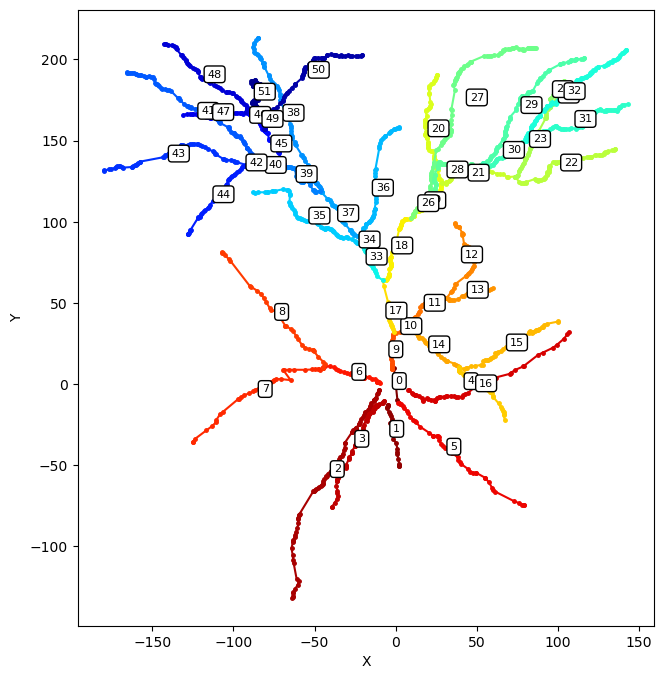

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
model.sec_tree.plot(ax, 
                    show_points=True,
                    show_lines=True,
                    annotate=True)

In [18]:
model.create_and_reference_sections_in_simulator()
# model.set_segmentation(d_lambda=0.1)
# model.add_group('all', model.domains)

Building sections in NEURON...
52 sections created.
Connecting tree.


## Add Mechanisms

In [19]:
model.path_manager.print_directory_tree('mod')

├── CaHVA
│   ├── CaHVA.mod
│   └── x86_64
├── CaHVA.mod
├── CaLVA
│   ├── CaLVA.mod
│   └── x86_64
├── CaLVA.mod
├── KCa
│   ├── KCa.mod
│   └── x86_64
├── KCa.mod
├── Ka
│   ├── Ka.mod
│   └── x86_64
├── Ka.mod
├── Km
│   ├── Km.mod
│   └── x86_64
├── Km.mod
├── Kv
│   ├── Kv.mod
│   └── x86_64
├── Kv.mod
├── Na
│   ├── Na.mod
│   └── x86_64
└── Na.mod


The choice here is:
- load all, add where needed (new, faster!)
- load one, add everywhere (old)

In [20]:
model.path_manager.list_files('default_mod')

[]

In [21]:
model.path_manager.get_file_path('default_mod', 'Leak', 'mod')

'/home/roman/Documents/code/DendroTweaks/app/src/data/Default/Leak.mod'

In [22]:
model.add_default_mechanisms(recompile=False)

Adding mechanism vecstim to model...
Using precompiled mechanism "vecstim"
Loaded mechanism "vecstim"
Mechanism vecstim loaded to NEURON.

Adding mechanism AMPA_NMDA to model...
Using precompiled mechanism "AMPA_NMDA"
Loaded mechanism "AMPA_NMDA"
Mechanism AMPA_NMDA loaded to NEURON.

Adding mechanism Leak to model...
Using precompiled mechanism "Leak"
Loaded mechanism "Leak"
Mechanism Leak loaded to NEURON.

Adding mechanism AMPA to model...
Using precompiled mechanism "AMPA"
Loaded mechanism "AMPA"
Mechanism AMPA loaded to NEURON.

Adding mechanism GABAa to model...
Using precompiled mechanism "GABAa"
Loaded mechanism "GABAa"
Mechanism GABAa loaded to NEURON.

Adding mechanism NMDA to model...
Using precompiled mechanism "NMDA"
Loaded mechanism "NMDA"
Mechanism NMDA loaded to NEURON.



In [23]:
model.mechanisms

{'Leak': <Mechnaism(Leak)>}

In [24]:
model.path_manager.print_directory_tree('mod')

├── CaHVA
│   ├── CaHVA.mod
│   └── x86_64
├── CaHVA.mod
├── CaLVA
│   ├── CaLVA.mod
│   └── x86_64
├── CaLVA.mod
├── KCa
│   ├── KCa.mod
│   └── x86_64
├── KCa.mod
├── Ka
│   ├── Ka.mod
│   └── x86_64
├── Ka.mod
├── Km
│   ├── Km.mod
│   └── x86_64
├── Km.mod
├── Kv
│   ├── Kv.mod
│   └── x86_64
├── Kv.mod
├── Na
│   ├── Na.mod
│   └── x86_64
└── Na.mod


In [25]:
model.add_mechanisms(recompile=False)

Replacing SUFFIX Na with SUFFIX Na
Overwritten /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/mod/Na.mod
Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python/Na.py
Registering Na from Na in /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python
Importing class Na from module Na.py
Mechanism Na added to model.
Adding mechanism Na to model...
Using precompiled mechanism "Na"
Loaded mechanism "Na"
Mechanism Na loaded to NEURON.

Replacing SUFFIX KCa with SUFFIX KCa
Overwritten /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/mod/KCa.mod
Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python/KCa.py
Registering KCa from KCa in /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python
Importing class KCa from module KCa.py
Mechanism KCa added to model.
Adding mechanism KCa to model...
Using precompiled mechanism "KCa"
Loaded mechanism "KCa"
Mechanism KCa loaded to NEURON

In [26]:
model.mechanisms

{'Leak': <Mechnaism(Leak)>,
 'Na': <Mechnaism(Na)>,
 'KCa': <Mechnaism(KCa)>,
 'Kv': <Mechnaism(Kv)>,
 'Ka': <Mechnaism(Ka)>,
 'CaHVA': <Mechnaism(CaHVA)>,
 'Km': <Mechnaism(Km)>,
 'CaLVA': <Mechnaism(CaLVA)>}

In [27]:
model.params

{'cm': {'all': constant({'value': 1})},
 'Ra': {'all': constant({'value': 35.4})}}

In [28]:
model.params_to_mechs

{'cm': 'Independent', 'Ra': 'Independent'}

In [29]:
model.mechs_to_params

{'Independent': ['cm', 'Ra']}

## Add groups

In [30]:
model.domains

['soma', 'dend', 'axon', 'apic']

In [31]:
model.set_section_param('cm', 1.0) # uF/cm2
model.set_section_param('Ra', 100) # Ohm cm

In [32]:
model.groups

{'all': SegmentGroup("all", domains=['soma', 'dend', 'axon', 'apic'])}

In [33]:
model.add_group('soma', domains=['soma'])

In [34]:
model._groups

[SegmentGroup("all", domains=['soma', 'dend', 'axon', 'apic']),
 SegmentGroup("soma", domains=['soma'])]

In [35]:
model.params

{'cm': {'all': constant({'value': 1})},
 'Ra': {'all': constant({'value': 35.4})}}

## Segmentation

### Set independent parameters

In [36]:
model.set_param(param_name='cm', 
                group_name='all',
                distr_type = 'uniform', value=1)
model.set_param(param_name='cm', 
                group_name='soma',
                distr_type = 'uniform', value=2)

In [37]:
model.set_param(param_name='Ra', 
                group_name='all',
                distr_type = 'uniform', value=100)

In [38]:
for sec in model.sec_tree:
    print(f'Section {sec.idx} cm:{sec._ref.cm}, Ra:{sec._ref.Ra}, diam:{sec._ref.diam}')
    if sec.idx >= 20:
        break

Section 0 cm:2.0, Ra:100.0, diam:20.437925338745117
Section 1 cm:1.0, Ra:100.0, diam:0.5899999737739562
Section 2 cm:1.0, Ra:100.0, diam:0.631550920056066
Section 3 cm:1.0, Ra:100.0, diam:0.9640363744961576
Section 4 cm:1.0, Ra:100.0, diam:0.9062012103031696
Section 5 cm:1.0, Ra:100.0, diam:0.9746563460933272
Section 6 cm:1.0, Ra:100.0, diam:1.3302929539799262
Section 7 cm:1.0, Ra:100.0, diam:0.7802926549655187
Section 8 cm:1.0, Ra:100.0, diam:0.7893759710373844
Section 9 cm:1.0, Ra:100.0, diam:2.0216273316949134
Section 10 cm:1.0, Ra:100.0, diam:0.8316965968921465
Section 11 cm:1.0, Ra:100.0, diam:0.7106647970088165
Section 12 cm:1.0, Ra:100.0, diam:0.4820348820924735
Section 13 cm:1.0, Ra:100.0, diam:0.4467302843039545
Section 14 cm:1.0, Ra:100.0, diam:0.5951329859385024
Section 15 cm:1.0, Ra:100.0, diam:0.4662710577713078
Section 16 cm:1.0, Ra:100.0, diam:0.4115946212020801
Section 17 cm:1.0, Ra:100.0, diam:2.059999942779541
Section 18 cm:1.0, Ra:100.0, diam:1.5413484648855549
Secti

In [39]:
model.params

{'cm': {'all': uniform({'value': 1}), 'soma': uniform({'value': 2})},
 'Ra': {'all': uniform({'value': 100})}}

### Create seg tree

In [40]:
d_lambda = 0.1
model.set_segmentation(d_lambda=0.1)

Connecting tree.


In [41]:
model.seg_tree

Tree [•0, •1, •2, •3, •4, •5, •6, •7, •8, •9, •10, •11, •12, •13, •14, •15, •16, •17, •18, •19, •20, •21, •22, •23, •24, •25, •26, •27, •28, •29, •30, •31, •32, •33, •34, •35, •36, •37, •38, •39, •40, •41, •42, •43, •44, •45, •46, •47, •48, •49, •50, •51, •52, •53, •54, •55, •56, •57, •58, •59, •60, •61, •62, •63, •64, •65, •66, •67, •68, •69, •70, •71, •72, •73, •74, •75, •76, •77, •78, •79, •80, •81, •82, •83, •84, •85, •86, •87, •88, •89, •90, •91, •92, •93, •94, •95, •96, •97, •98, •99, •100, •101, •102, •103, •104, •105, •106, •107, •108, •109, •110, •111, •112, •113, •114, •115, •116, •117, •118, •119, •120, •121, •122, •123, •124, •125, •126, •127, •128, •129, •130, •131, •132, •133, •134, •135, •136, •137, •138, •139, •140, •141, •142, •143, •144, •145, •146, •147, •148, •149, •150, •151, •152, •153, •154, •155, •156, •157, •158, •159, •160, •161, •162, •163, •164, •165, •166, •167, •168, •169, •170, •171, •172, •173, •174, •175, •176, •177, •178, •179, •180, •181, •182, •183, 

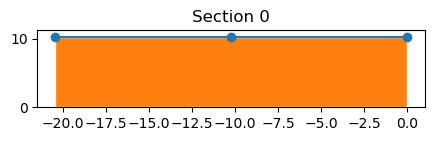

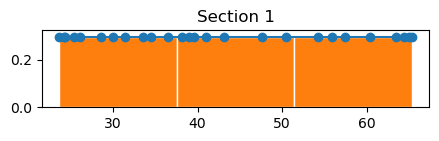

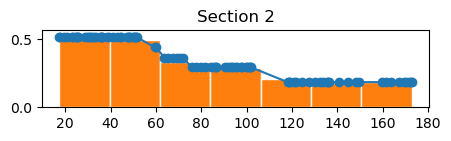

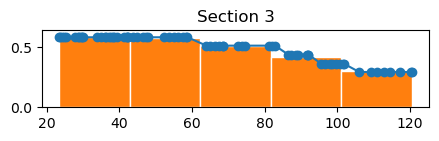

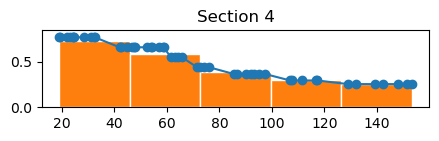

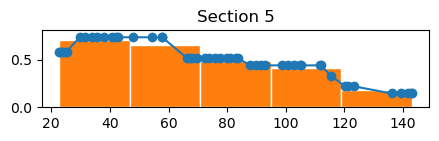

In [42]:
for sec in model.sec_tree.sections:
        fig, ax = plt.subplots(figsize=(5, 1))
        sec.plot_radii(ax)
        ax.set_title(f'Section {sec.idx}')
        if sec.idx >= 5:
            break

In [43]:
len(model.seg_tree)

186

## Distribute mech parameters

In [44]:
model.domains_to_mechanisms

{'soma': ['Independent'],
 'axon': ['Independent'],
 'dend': ['Independent'],
 'apic': ['Independent']}

In [45]:
all_domains = ['soma', 'dend', 'axon', 'apic']
for domain in all_domains:
    model.insert_mechanism('Leak', domain)
    model.insert_mechanism('Na', domain)
    model.insert_mechanism('Kv', domain)

In [46]:
model.domains_to_mechanisms

{'soma': ['Independent', 'Leak', 'Na', 'Kv'],
 'axon': ['Independent', 'Leak', 'Na', 'Kv'],
 'dend': ['Independent', 'Leak', 'Na', 'Kv'],
 'apic': ['Independent', 'Leak', 'Na', 'Kv']}

In [47]:
model.mechs_to_params

{'Independent': ['cm', 'Ra', 'ena', 'ek'],
 'Leak': ['gbar_Leak', 'e_Leak'],
 'Na': ['gbar_Na',
  'Rma_Na',
  'Rmb_Na',
  'v12m_Na',
  'qm_Na',
  'Rhb_Na',
  'Rha_Na',
  'v12ha_Na',
  'v12hb_Na',
  'qh_Na',
  'v12hinf_Na',
  'qhinf_Na'],
 'Kv': ['gbar_Kv', 'v12_Kv', 'q_Kv']}

In [48]:
pprint(model.params, sort_dicts=False, width=1)

{'cm': {'all': uniform({'value': 1}),
        'soma': uniform({'value': 2})},
 'Ra': {'all': uniform({'value': 100})},
 'gbar_Leak': {'all': constant({'value': 0.0})},
 'e_Leak': {'all': constant({'value': -70})},
 'gbar_Na': {'all': constant({'value': 0.0})},
 'Rma_Na': {'all': constant({'value': 0.182})},
 'Rmb_Na': {'all': constant({'value': 0.14})},
 'v12m_Na': {'all': constant({'value': -30})},
 'qm_Na': {'all': constant({'value': 9.8})},
 'Rhb_Na': {'all': constant({'value': 0.0091})},
 'Rha_Na': {'all': constant({'value': 0.024})},
 'v12ha_Na': {'all': constant({'value': -45})},
 'v12hb_Na': {'all': constant({'value': -70})},
 'qh_Na': {'all': constant({'value': 5})},
 'v12hinf_Na': {'all': constant({'value': -60})},
 'qhinf_Na': {'all': constant({'value': 6.2})},
 'ena': {'all': constant({'value': 50})},
 'gbar_Kv': {'all': constant({'value': 0.0})},
 'v12_Kv': {'all': constant({'value': 25})},
 'q_Kv': {'all': constant({'value': 9})},
 'ek': {'all': constant({'value': -77})}}


In [49]:
model.params_to_dataframe()

,Mechanism,Parameter,Group,Distribution
0,Independent,cm,all,uniform({'value': 1})
1,Independent,cm,soma,uniform({'value': 2})
2,Independent,Ra,all,uniform({'value': 100})
3,Independent,ena,all,constant({'value': 50})
4,Independent,ek,all,constant({'value': -77})
5,Leak,gbar_Leak,all,constant({'value': 0.0})
6,Leak,e_Leak,all,constant({'value': -70})
7,Na,gbar_Na,all,constant({'value': 0.0})
8,Na,Rma_Na,all,constant({'value': 0.182})
9,Na,Rmb_Na,all,constant({'value': 0.14})


In [50]:
model.set_param(param_name='gbar_Leak',
                group_name='all',
                distr_type = 'uniform', value=0.0001)

In [51]:
model.set_param(param_name='gbar_Na',
                group_name='all',
                distr_type = 'uniform', value=0.03)
model.set_param(param_name='gbar_Na',
                group_name='soma',
                distr_type = 'uniform', value=0.05)

In [52]:
model.set_param(param_name='gbar_Kv',
                group_name='all', 
                distr_type = 'uniform', value=0.003)
model.set_param(param_name='gbar_Kv',
                group_name='soma', 
                distr_type = 'uniform', value=0.005)

In [53]:
model.mechs_to_params

{'Independent': ['cm', 'Ra', 'ena', 'ek'],
 'Leak': ['gbar_Leak', 'e_Leak'],
 'Na': ['gbar_Na',
  'Rma_Na',
  'Rmb_Na',
  'v12m_Na',
  'qm_Na',
  'Rhb_Na',
  'Rha_Na',
  'v12ha_Na',
  'v12hb_Na',
  'qh_Na',
  'v12hinf_Na',
  'qhinf_Na'],
 'Kv': ['gbar_Kv', 'v12_Kv', 'q_Kv']}

In [54]:
model.info()

Model: Park_2019
Path to data: /home/roman/Documents/code/DendroTweaks/app/src/data
Simulator: NEURON
Groups: 2
Avaliable mechanisms: 8
Inserted mechanisms: 3
IClamps: 0



In [56]:
model.set_param(param_name='e_Leak', group_name='soma')

In [57]:
model.params_to_dataframe()

,Mechanism,Parameter,Group,Distribution
0,Independent,cm,all,uniform({'value': 1})
1,Independent,cm,soma,uniform({'value': 2})
2,Independent,Ra,all,uniform({'value': 100})
3,Independent,ena,all,constant({'value': 50})
4,Independent,ek,all,constant({'value': -77})
5,Leak,gbar_Leak,all,uniform({'value': 0.0001})
6,Leak,e_Leak,all,constant({'value': -70})
7,Leak,e_Leak,soma,uniform({'value': 0})
8,Na,gbar_Na,all,uniform({'value': 0.03})
9,Na,gbar_Na,soma,uniform({'value': 0.05})


In [55]:
# model.add_group('axon', lambda sec: sec.domain == 'axon')

## Problem with diams

In [56]:
# Section diam in NEURON
sec._ref.diam

0.9730643074640786

In [57]:
# diam of each segment in NEURON
seg_diams = np.array([seg.diam for seg in sec._ref])
print(f'{seg_diams.size} segments with diam {seg_diams.mean()}')

5 segments with diam 0.9746563460933271


In [58]:
# diam of each pt3d in neuron
pts3d_diams = np.array([sec._ref.diam3d(i) for i in range(sec._ref.n3d())])
print(f'{pts3d_diams.size} pt3d with diam {pts3d_diams.mean()}')

49 pt3d with diam 0.9991836675575801


In [59]:
# diam of each pt3d in custom section
swc_diams = np.array([2*pt.r for pt in sec.pts3d])
print(f'{swc_diams.size} pt3d with diam {swc_diams.mean()}')

49 pt3d with diam 0.9991836734693877


In [60]:
for i, (swc_diam, neuron_diam) in enumerate(zip(swc_diams, pts3d_diams)):
    print(f'{swc_diam} {neuron_diam}')
    if i > 10 : break

1.17 1.1699999570846558
1.17 1.1699999570846558
1.17 1.1699999570846558
1.17 1.1699999570846558
1.17 1.1699999570846558
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295


In [61]:
# from core.utils import calculate_lambda_f
# from neuron import h
# h.load_file('stdrun.hoc')
# f = 100
# for sec in model.sec_tree.sections:
#     neuron_sec = sec._ref
#     # diam = neuron_sec.diam
#     diam = np.array([seg.diam for seg in sec._ref]).mean()
#     lambda_f = calculate_lambda_f(diam, neuron_sec.Ra, neuron_sec.cm)
#     lambda_f_neuron = h.lambda_f(f, sec=neuron_sec)
#     nseg = int((neuron_sec.L / (0.1 * lambda_f) + 0.9) / 2) * 2 + 1
#     # print(f'Section {sec.idx} has {nseg} segments with lambda_f = {lambda_f:.5f} um')
#     nseg_neuron = int((neuron_sec.L / (0.1 * lambda_f_neuron) + 0.9) / 2) * 2 + 1
#     # print(f'Section {sec.idx} has {nseg} segments with lambda_f = {lambda_f_neuron:.5f} um')
#     # print(f'Neuron lambda_f = {lambda_f_neuron:.5f} um, calculated lambda_f = {lambda_f:.5f} um')
#     print(f'Neuron nseg = {nseg_neuron}, calculated nseg = {nseg}')

# Problem with nseg

Text(0.5, 1.0, 'Correspondence between nseg and length')

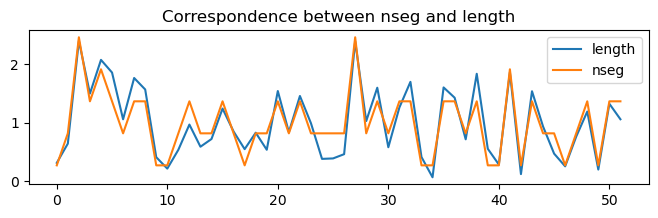

In [62]:
fig, ax = plt.subplots(figsize=(8, 2))
sec_ids = np.array([sec.idx for sec in model.sec_tree.sections])
sec_nseg = np.array([sec._ref.nseg for sec in model.sec_tree.sections])
sec_diams = np.array([np.array([seg.diam for seg in sec._ref]).mean() for sec in model.sec_tree.sections])
# sec_cm = np.array([sec._ref.cm for sec in model.sec_tree.sections])
# sec_Ra = np.array([sec._ref.Ra for sec in model.sec_tree.sections])
sec_lenghts = np.array([sec._ref.L for sec in model.sec_tree.sections])
# draw a vertical line between nseg and length datapoints for each section

sec_nseg = sec_nseg / sec_nseg.mean()
sec_lenghts = sec_lenghts / sec_lenghts.mean()

ys = sec_nseg - sec_lenghts

# ax.vlines(sec_ids, sec_nseg, sec_lenghts, color='k', label='nseg')
ax.plot(sec_ids, sec_lenghts, '-', label='length')
ax.plot(sec_ids, sec_nseg, '-', label='nseg')
# ax.stem(sec_ids, ys, use_line_collection=True)
ax.legend()
ax.set_title('Correspondence between nseg and length')

In [63]:
for sec in model.sec_tree.sections:
    print(f'Section {sec.idx} has {sec._ref.nseg} segments')

Section 0 has 1 segments
Section 1 has 3 segments
Section 2 has 9 segments
Section 3 has 5 segments
Section 4 has 7 segments
Section 5 has 5 segments
Section 6 has 3 segments
Section 7 has 5 segments
Section 8 has 5 segments
Section 9 has 1 segments
Section 10 has 1 segments
Section 11 has 3 segments
Section 12 has 5 segments
Section 13 has 3 segments
Section 14 has 3 segments
Section 15 has 5 segments
Section 16 has 3 segments
Section 17 has 1 segments
Section 18 has 3 segments
Section 19 has 3 segments
Section 20 has 5 segments
Section 21 has 3 segments
Section 22 has 5 segments
Section 23 has 3 segments
Section 24 has 3 segments
Section 25 has 3 segments
Section 26 has 3 segments
Section 27 has 9 segments
Section 28 has 3 segments
Section 29 has 5 segments
Section 30 has 3 segments
Section 31 has 5 segments
Section 32 has 5 segments
Section 33 has 1 segments
Section 34 has 1 segments
Section 35 has 5 segments
Section 36 has 5 segments
Section 37 has 3 segments
Section 38 has 5 segme

# Mechanisms kinetics

Got data for v in range -100.0 to 100.0 at 37°C
Got data for v in range -100.0 to 100.0 at 37°C


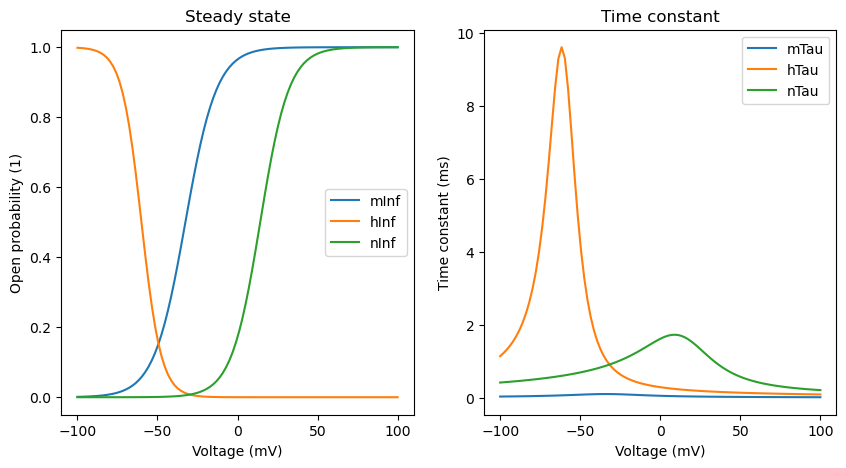

In [64]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
model.mechanisms['Na'].plot_kinetics(ax)
model.mechanisms['Kv'].plot_kinetics(ax)

# Simulate

In [ ]:
model.set_param('e_Leak', value=-79)
model.set_param('ena', value=60)
model.set_param('ek', value=-80)
model.set_param('temperature', value=37)
model.set_param('v_init', value=-79)

In [66]:
soma = model.sec_tree.soma

In [67]:
soma._ref.psection()

{'point_processes': {},
 'density_mechs': {'Leak': {'gbar': [0.0001], 'e': [-79.0], 'i': [0.0]},
  'Na': {'gbar': [0.05],
   'Rma': [0.182],
   'Rmb': [0.14],
   'v12m': [-30.0],
   'qm': [9.8],
   'Rhb': [0.0091],
   'Rha': [0.024],
   'v12ha': [-45.0],
   'v12hb': [-70.0],
   'qh': [5.0],
   'v12hinf': [-60.0],
   'qhinf': [6.2],
   'i': [0.0],
   'm': [0.0],
   'h': [0.0]},
  'Kv': {'gbar': [0.005], 'v12': [25.0], 'q': [9.0], 'i': [0.0], 'n': [0.0]}},
 'ions': {'na': {'ena': [60.0],
   'nai': [10.0],
   'nao': [140.0],
   'ina': [0.0],
   'dina_dv_': [0.0]},
  'k': {'ek': [-80.0],
   'ki': [54.4],
   'ko': [2.5],
   'ik': [0.0],
   'dik_dv_': [0.0]}},
 'morphology': {'L': 20.43792569120254,
  'diam': [20.437925338745117],
  'pts3d': [(1.0855352878570557,
    -10.078556060791016,
    -1.292873740196228,
    20.437925338745117),
   (0.0, 0.0, 0.0, 20.437925338745117),
   (-1.0855352878570557,
    10.078556060791016,
    1.292873740196228,
    20.437925338745117)],
  'parent': None,
  

In [68]:
model.add_recording(soma, loc=0.5)

In [69]:
model.simulator.recordings

{•0: Vector[0]}

In [70]:
model.remove_all_iclamps()
model.add_iclamp(soma, loc=0.5, amp=0.15, delay=100, dur=100)

IClamp added to sec ••0 at loc 0.5.


In [71]:
model.iclamps

{•0: <IClamp(sec[0](0.50))>}

In [72]:
t, v, _ = model.simulator.run(duration=300)

(-100.0, 60.0)

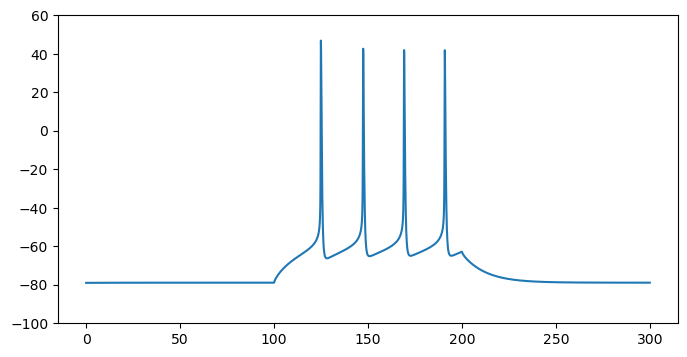

In [73]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t[0], v[0])
ax.set_ylim(-100, 60)

# Synapses

In [75]:
model.path_manager.print_directory_tree('default_mod')

├── AMPA
│   ├── AMPA.mod
│   └── x86_64
├── AMPA.mod
├── AMPA_NMDA
│   ├── AMPA_NMDA.mod
│   └── x86_64
├── AMPA_NMDA.mod
├── GABAa
│   ├── GABAa.mod
│   └── x86_64
├── GABAa.mod
├── Leak
│   ├── Leak.mod
│   └── x86_64
├── Leak.mod
├── NMDA
│   ├── NMDA.mod
│   └── x86_64
├── NMDA.mod
├── vecstim
│   ├── vecstim.mod
│   └── x86_64
└── vecstim.mod


In [76]:
model.add_population(
    segments=[seg for sec in model.get_sections(lambda sec: sec.domain == 'dend') for seg in sec.segments], 
    N=10, 
    syn_type='AMPA'
)

In [77]:
pop = model.populations['AMPA']['AMPA_0']

Text(0, 0.5, 'Number of synapses')

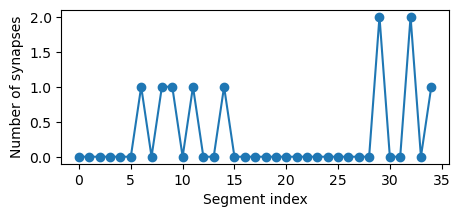

In [78]:
fig, ax = plt.subplots(figsize=(5, 2))
# histogram of synapse N per secton (pop.n_per_sec)
plt.plot([v for k,v in pop.n_per_seg.items()], 'o-');
plt.xlabel('Segment index')
plt.ylabel('Number of synapses')

In [79]:
pop.update_input_params({'rate':100, 'weight':1, 'noise':1})

In [80]:
model.export_data()

{'type': ['recording'], 'idx': [0], 'sec_idx': [0], 'loc': [0.5], 'n_per_seg': [1]}
